In [1]:
!apt-get moo

                 (__) 
                 (oo) 
           /------\/ 
          / |    ||   
         *  /\---/\ 
            ~~   ~~   
..."Have you mooed today?"...


В этом ноутбуке мы рассмотрим базовые команды командной строки в Linux

План
  - Команды UNIX
  - Файловая система
  - Аргументы к командам
  - Переменные окружения


# Команды в UNIX

Линукс принадлежит к большому семейству операционных систем под названием UNIX, которые происходят от ОС AT&T Unix, разработанной еще в 1970-х. Mac OS, кстати, тоже её потомок.

В операционных системах UNIX-типа для взаимодействия с ОС используют специальные команды. До появления привычного оконного интерфейса пользователи взаимодействовали с компьютером исключительно с помощью этих команд.

Сейчас этот способ тоже используют, т. к. у него есть ряд преимуществ:
 - намного более удобней при подключение к компьютеру по сети;
 - иногда удобнее запустить одну команду, чем бродить по менюшкам в поисках нужной опции;
 - из команды можно составлять скрипты для автоматизации задач.



Небольшой ликбез по понятиям:
- **Командная строка** - интерфейс пользователя, окно для вывода системных сообщений и приёма команд;
- **Терминал** - программа, которая отображает строку. Например: *gnome-terminal*, *xterm*, *tilda*;
- **Оболочка (shell)** - программа которая выполняет команды. Например: *bash*, *zsh*, *sh*;
- **Консоль** - комплект устройств интерактивного ввода-вывода (дисплей, клавиатура, мышь) для управления компьютером.

Запускать команды можно как из терминала, так и из юпитера или колаба (Google Colab), поставив перед командой "!":

In [2]:
!echo "Hello World"

Hello World


# Файловая система

В Unix-системах все файлы образуют структуру похожую на дерево, в каждой директории (папке) хранятся файлы и другие директории. Самая первая директория которая содержит все остальные, называется корневой (*root*)


У каждой директории есть путь (по сути, просто строка) который показывает где она находится в этом дереве. "/" - это путь корневой директории.

---



![alt text](http://linuxcommand.org/images/file_manager.jpg)

В командной строке все команды выполняются в какой-либо директории.

Представьте, что дерево файловой системы - это лабиринт, и каждая директория - это комната с файлами и дверьми в другие директории. В каждый момент времени вы находитесь в одной комнате.

Посмотрим, как ходить по нашему лабиринту.

In [1]:
# Выведем путь текущей директории
!pwd

/content


In [2]:
# Посмотрим, что в нашей директории есть
!ls
#ls is for "list"

sample_data


In [3]:
#Создадим пустой файлик
!touch test-file
# пробел в имени - плохая идея, создадутся два файла
!touch hello world

# посмотрим что получилось
!ls

hello  sample_data  test-file  world


In [4]:
#Удаление файлов
!rm world
!ls

hello  sample_data  test-file


In [5]:
# Новая директория
!mkdir please_come_here
!ls

hello  please_come_here  sample_data  test-file


Некоторые директории хранят файлы необходимые для работы программ. В них нужно что-либо менять только если знаешь, что делаешь.

Это так называемые скрытые директории (hidden или dot directories/files) - их имя начинается с точки.


In [6]:
# Покажем больше информации и отобразим скрытые файлы
!ls -al
# Первое слово - команда, а второе - аргумент

total 20
drwxr-xr-x 1 root root 4096 Feb 28 12:00 .
drwxr-xr-x 1 root root 4096 Feb 28 11:56 ..
drwxr-xr-x 4 root root 4096 Jan 16 14:24 .config
-rw-r--r-- 1 root root    0 Feb 28 12:00 hello
drwxr-xr-x 2 root root 4096 Feb 28 12:00 please_come_here
drwxr-xr-x 1 root root 4096 Jan 16 14:24 sample_data
-rw-r--r-- 1 root root    0 Feb 28 12:00 test-file




```
.  - это путь к той директории в которой мы уже находимся
.. - это путь к родительской директории
.config - это скрытая папка
```

Каждая строчка - это одна из "дверей" в другую директорию либо файл.
*Относительный* путь это не полный "адрес" директории а то, куда нам нужно пойти из места в котором мы сейчас находимся.


```
 drwxr-xr-x 1 root root 4096 Feb 15 17:21 please_come_here
 |                           дата создания    |
 |                                         _относительный_ путь
 |
  \ d - эта метка значит, что это путь к другой директории (d for directory)
```



In [7]:
# переход в другую директорию команда cd
!pwd
!cd please_come_here
!pwd

/content
/content


Заработало?

Не должно. Тут проблема в том что юпитер при исполнении каждой команды запускает новую оболочку в своей директории (той, откуда его вызвали), и после завершения команды она закрывается. Т. е. в одной оболочке он выполнил команду pwd, закрыл её, в другой выполнил команду cd please_come_here, закрыл её, и в третьей выполнил команду pwd и закрыл её.

Чтоб команды запускались в новой директории нужно поменять текущую директорию самого юпитера с помощью команды:

```
%cd
```


In [8]:
!pwd
%cd please_come_here
!pwd

/content
/content/please_come_here
/content/please_come_here


Если выполнить команду cd без аргументов - он вернёт вас в домашнюю директорию:

In [9]:
%cd
!pwd

/root
/root


Когда мы переходим в другую директорию, ее имя добавляется к нашему пути через "/".

Например, были в `/home`, перешли в директорию `Pictures `оказались в `/home/Pictures`.

Абсолютный путь файла в этой директории будет `/home/Picutes/image.png`.

Если мы хотим взять файл из директории, которая является дочерней к той директории, где мы сейчас находимся, мы можем указать относительный путь файла.

Например, из директории `/home` мы можем обратиться к файлу по пути `Pictures/image.png`.

In [10]:
# Можно выполнить несколько команд последовательно:
# с помощью символа ; - для безусловного последовательного выполнения команд, они выполнятся последовательно одна за другой:
!pwd; cd please_come_here; pwd

# с помощью символа && - при этом вторая (и последующая) команда выполнится только в случае успешного выполнения первой (предыдущей):
!pwd && cd please_come_here && pwd

# с помощью символа || - при этом вторая (и последующая) команда выполнится только в случае неуспешного выполнения первой (предыдущей):
!pwd || cd please_come_here && pwd


/root
/bin/bash: line 1: cd: please_come_here: No such file or directory
/root
/root
/bin/bash: line 1: cd: please_come_here: No such file or directory
/root
/root


## Запись и чтение в файлы

In [11]:
# Вывести текст в консоль

!echo "Sample text Пример текста"
# Echo - потому что команда выводит на выход то же, что и получает

Sample text Пример текста


In [12]:
# Вместо консоли отправить в файл

!echo "London is the capital of Great Britain" >> English.txt


In [13]:
# Прочитать файл и вывести в консоль

!cat English.txt

London is the capital of Great Britain


## Скачивание из интернета

In [14]:
# сохраняем страницу по адресу

!curl example.com >> example-com.html
!ls
!cat example-com.html


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   528    0   528    0     0   9828      0 --:--:-- --:--:-- --:--:--  9962
English.txt  example-com.html
<!doctype html><html lang="en"><head><title>Example Domain</title><meta name="viewport" content="width=device-width, initial-scale=1"><style>body{background:#eee;width:60vw;margin:15vh auto;font-family:system-ui,sans-serif}h1{font-size:1.5em}div{opacity:0.8}a:link,a:visited{color:#348}</style></head><body><div><h1>Example Domain</h1><p>This domain is for use in documentation examples without needing permission. Avoid use in operations.</p><p><a href="https://iana.org/domains/example">Learn more</a></p></div></body></html>


In [16]:
!curl instagram.com

Иногда сервера пытаются перенаправить запрос на другой адрес. Curl не следует по таким перенаправлениям. Есть програмка wget которая может переходить по таким ссылкам и вообще проходить по всем ссылкам на странице и скачивать их.

In [15]:
!wget instagram.com -O insta.html

--2026-02-28 12:10:13--  http://instagram.com/
Resolving instagram.com (instagram.com)... 163.70.159.174, 2a03:2880:f215:1e0:face:b00c:0:4420
Connecting to instagram.com (instagram.com)|163.70.159.174|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://instagram.com/ [following]
--2026-02-28 12:10:13--  https://instagram.com/
Connecting to instagram.com (instagram.com)|163.70.159.174|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.instagram.com/ [following]
--2026-02-28 12:10:13--  https://www.instagram.com/
Resolving www.instagram.com (www.instagram.com)... 163.70.158.174, 2a03:2880:f215:1e0:face:b00c:0:4420
Connecting to www.instagram.com (www.instagram.com)|163.70.158.174|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.facebook.com/unsupportedbrowser [following]
--2026-02-28 12:10:13--  https://www.facebook.com/unsupportedbrowser
Resolving w

Обратите внимание на

`HTTP request sent, awaiting response... 301 Moved Permanently` (четвёртая строка)


# Аргументы и параметры к командам

Обычно **аргументы** – это то, над чем выполняется команда. Например, команда перехода в другую директорию должна получить в качестве аргумента путь директории, в которую следует перейти. Команде вывода на экран содержимого файла надо передать имя файла.

**Параметры** модифицируют, как бы видоизменяют/управляют работой программы. Например, с помощью команды просмотра содержимого каталога можно вывести простой список вложенных объектов. Используя же определенный параметр, можно получить подробные сведения о каждом файле и папке.

Аргументы указывают через пробел, как отдельные слова.

Параметры указывают после дефиса: `-f` (однобуквенные) либо после двух дефисов: `--file`.

In [18]:
!apt-get update && apt-get install -y bsdmainutils

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.2 kB]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [357 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,787 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,772 kB]
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Pack

In [19]:
# календарик на весь год

!ncal 2026


                                  2026
    January           February          March             April             
Su     4 11 18 25     1  8 15 22        1  8 15 22 29        5 12 19 26   
Mo     5 12 19 26     2  9 16 23        2  9 16 23 30        6 13 20 27   
Tu     6 13 20 27     3 10 17 24        3 10 17 24 31        7 14 21 28   
We     7 14 21 28     4 11 18 25        4 11 18 25        1  8 15 22 29   
Th  1  8 15 22 29     5 12 19 26        5 12 19 26        2  9 16 23 30   
Fr  2  9 16 23 30     6 13 20 27        6 13 20 27        3 10 17 24      
Sa  3 10 17 24 31     7 14 21 28        7 14 21 28        4 11 18 25      

    May               June              July              August            
Su     3 10 17 24 31     7 14 21 28        5 12 19 26        2  9 16 23 30
Mo     4 11 18 25     1  8 15 22 29        6 13 20 27        3 10 17 24 31
Tu     5 12 19 26     2  9 16 23 30        7 14 21 28        4 11 18 25   
We     6 13 20 27     3 10 17 24        1  8 15 22 29   

In [20]:
# передаем 2 аргумента

!ncal 11 2026


    November 2026     
Su  1  8 15 22 29   
Mo  2  9 16 23 30   
Tu  3 10 17 24      
We  4 11 18 25      
Th  5 12 19 26      
Fr  6 13 20 27      
Sa  7 14 21 28      


In [21]:
# передаем параметр -b

!ncal -b 03 2026


     March 2026       
Su Mo Tu We Th Fr Sa  
 1  2  3  4  5  6  7  
 8  9 10 11 12 13 14  
15 16 17 18 19 20 21  
22 23 24 25 26 27 28  
29 30 31              
                      


In [24]:
# Однобуквенные параметры можно склеивать

!ncal -wb 03 2026
!ncal -b -w 04 2026
!ncal -bw 05 2026

       March 2026          
 w| Su Mo Tu We Th Fr Sa   
10|  1  2  3  4  5  6  7   
11|  8  9 10 11 12 13 14   
12| 15 16 17 18 19 20 21   
13| 22 23 24 25 26 27 28   
14| 29 30 31               
                           
       April 2026          
 w| Su Mo Tu We Th Fr Sa   
14|           1  2  3  4   
15|  5  6  7  8  9 10 11   
16| 12 13 14 15 16 17 18   
17| 19 20 21 22 23 24 25   
18| 26 27 28 29 30         
                           
        May 2026           
 w| Su Mo Tu We Th Fr Sa   
18|                 1  2   
19|  3  4  5  6  7  8  9   
20| 10 11 12 13 14 15 16   
21| 17 18 19 20 21 22 23   
22| 24 25 26 27 28 29 30   
23| 31                     


# Переменные окружения

Оболочка в себе содержит так называемые переменные окружения - глобальные константы которые доступны всем программам которые она выполняет. В них удобно хранить например путь к конфигурационным файлам или порт какого нибудь сервиса.

Переменные окружения зачастую определяют как ведет себя программа. Например, Python ищет пакеты в переменной `PYTHONPATH`.

В переменной `PATH` находятся пути в которых Bash ищет исполняемые файлы других программ.


In [25]:
# объявляем переменную и считываем ее ($ перед именем)
!FOO=kindersurprise && echo $FOO

kindersurprise


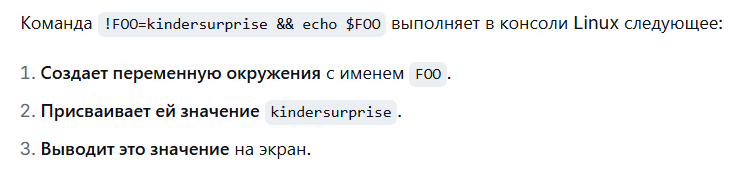

In [26]:
!echo $PATH
!echo $PYTHONPATH

/opt/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/env/python


Мы можем создать новую папку и заставить питон думать что в ней лежит модуль:

In [27]:
!rm -r fakemodule
!mkdir fakemodule
!mkdir fakemodule/power
!echo "print('A great power comes with a great responsibility')" >> fakemodule/power/__init__.py


rm: cannot remove 'fakemodule': No such file or directory


In [28]:
!export a="Эта переменная будет доступна другим программам вызванным в той же оболочке" && echo $a
# Но тут уже не получится, для каждой команды Jupyter запускает свою оболочку
!echo $a

Эта переменная будет доступна другим программам вызванным в той же оболочке



In [29]:
!PYTHONPATH=$PYTHONPATH:$(pwd)/fakemodule && python -c 'import power'

A great power comes with a great responsibility


Конструкция `$(pwd)` подставляет вывод команды `pwd` в выражение.

```
PYTHONPATH=$PYTHONPATH:$(pwd)/fakemodule

```
После подстановки переменных мы получим:

```
PYTHONPATH=<то что было в PYTHONPATH>:<текущая директория>/fakemodule

```
Это добавит нашу fakemodule в переменную окружения и позволит питону найти наш модуль.


In [30]:
!echo $(pwd)

/root


С помощью этой конструкции можно из результата выполнения команды создать переменную и сразу ей воспользоваться:

In [31]:
!dt_now=$(date); echo $dt_now

Sat Feb 28 12:29:35 PM UTC 2026


Для более углублённого изучения Linux в целом и командной оболочки в частности рекомендуем пройти курс Введение в Linux от Института биоинформатики https://stepik.org/course/73